In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

red = pd.read_csv("data/out_binary_class_scaled.csv")

red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1130,-1.348760,0.472561,-0.920875,-0.411432,0.852138,2.005078,0.124061,-1.072016,0.958482,-0.432124,0.153822,0
1131,-1.556604,0.168814,-0.809927,0.044154,-1.186476,2.820555,0.408443,-0.930741,1.496465,1.174772,0.888193,1
1132,-1.279478,-0.074184,-0.643503,0.271947,-0.167169,1.655588,-0.038443,-0.532602,0.727918,1.085500,0.678372,1
1133,-1.556604,0.745933,-0.698978,-0.411432,-0.239977,2.005078,0.124061,-0.705985,1.880738,0.728412,-0.160908,0
1134,-1.487322,-1.289172,1.242627,3.233255,-0.822438,0.374124,0.042809,-0.693142,0.497354,0.282052,0.678372,1


In [2]:
X = red.drop(['quality'], axis=1)
y = red['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    X_train, y_train, test_size=0.2)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim=len(X.columns), activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 845
Trainable params: 845
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('test-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, 
                    batch_size=100, epochs=100,
                    validation_data=(val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 0.7082 - accuracy: 0.4421 - val_loss: 0.7045 - val_accuracy: 0.4451
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5014 - val_loss: 0.6938 - val_accuracy: 0.5330
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5758 - val_loss: 0.6845 - val_accuracy: 0.5714
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6747 - accuracy: 0.6240 - val_loss: 0.6729 - val_accuracy: 0.6209
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6570 - val_loss: 0.6582 - val_accuracy: 0.6538
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6915 - val_loss: 0.6399 - val_accuracy: 0.6923
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6316 - accuracy: 0.6983 - val_loss: 0.6188 - val_accuracy: 0.7418
Epoch 8/100
8/8 [=========

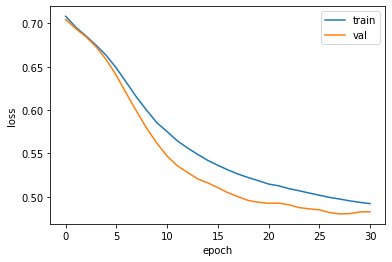

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

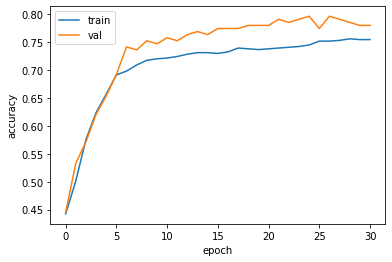

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 914us/step - loss: 0.5370 - accuracy: 0.7093


[0.5370168685913086, 0.7092511057853699]